# Emissions Analysis for ST18 and ST14 Engines

This notebook analyzes emissions data across different engine tiers and operating conditions.
- Computes summary statistics (mean, max, std dev)
- Calculates skewness
- Detects outliers using the IQR method
- Visualizes distribution using violin plots

In [1]:
import pandas as pd
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

## Load and Prepare Data

In [2]:
# Load the datasets and combine them
df_st18 = pd.read_csv("GeneralInspectionReport ST18.csv")
df_st14 = pd.read_csv("GeneralInspectionReport ST14.csv")
df = pd.concat([df_st18, df_st14], ignore_index=True)

In [3]:
print(df.columns)

Index(['Machine Number', 'Category', 'Reading'], dtype='object')


In [4]:
# Get unique values in the "Machine Number" column
unique_machines = df["Machine Number"].unique()

# Print the unique values
print("Unique Machine Numbers:")
for machine in unique_machines:
    print(machine)

# Show unique values in the "Category" column
unique_categories = df["Category"].dropna().unique()
print("Unique Categories:")
for category in unique_categories:
    print(category)
  

Unique Machine Numbers:
LD078
LD082
LD079
LD070
LD083
LD086
LD071
LD085
LD084
LD076
LD072
LD094
RB016
Unique Categories:
IDLE CO
IDLE NO
IDLE NO2
IDLE NOX
HIGH IDLE CO
HIGH IDLE NO
HIGH IDLE NO2
HIGH IDLE NOX
STALL CO
STALL NO
STALL NO2
STALL NOX
- DPM mg/m3


In [5]:
# Map machine numbers to engine tiers
tier_mapping = {
    'LD070': 'Tier 4', 'LD071': 'Tier 4', 'LD076': 'Tier 4', 'LD078': 'Tier 4', 'LD094': 'Tier 4',
    'LD079': 'Tier 5', 'LD083': 'Tier 5', 'LD084': 'Tier 5', 'LD082': 'Tier 5', 'LD086': 'Tier 5', 'LD085': 'Tier 5', 'LD072': 'Tier 5',
    'RB016': 'Tier 3A', 'LD210': 'Tier 3A'
}
df['Tier'] = df['Machine Number'].map(tier_mapping)

# Extract Condition and Pollutant
df[['Condition', 'Pollutant']] = df['Category'].str.extract(r'^(IDLE|HIGH IDLE|STALL|-)\s*(CO|NO2|NOX|NO|DPM mg/m3)?')

# Clean data
df_clean = df.dropna(subset=['Tier', 'Condition', 'Reading'])

In [18]:
df_clean

,Machine Number,Category,Reading,Tier,Condition,Pollutant
0,LD078,IDLE CO,0.00,Tier 4,IDLE,CO
1,LD078,IDLE NO,1.00,Tier 4,IDLE,NO
2,LD078,IDLE NO2,0.80,Tier 4,IDLE,NO2
3,LD078,IDLE NOX,1.80,Tier 4,IDLE,NOX
4,LD078,HIGH IDLE CO,0.00,Tier 4,HIGH IDLE,CO
5,LD078,HIGH IDLE NO,21.00,Tier 4,HIGH IDLE,NO
6,LD078,HIGH IDLE NO2,13.40,Tier 4,HIGH IDLE,NO2
7,LD078,HIGH IDLE NOX,34.40,Tier 4,HIGH IDLE,NOX
8,LD078,STALL CO,0.00,Tier 4,STALL,CO
9,LD078,STALL NO,55.00,Tier 4,STALL,NO


-------------- SKIP BELOW -----------------

## Compute Summary Statistics

In [19]:
summary = (
    df_clean.groupby(['Tier', 'Condition', 'Pollutant'])['Reading']
    .agg(['mean', 'max', 'std'])
    .rename(columns={'mean': 'Mean', 'max': 'Max', 'std': 'StdDev'})
    .round(2)
    # .reset_index()
)
summary

Mean       Max    StdDev
Tier    Condition Pollutant                              
Tier 3A -         DPM mg/m3   6005.00   23400.0  11597.94
        HIGH IDLE CO           114.00     176.0     76.15
                  NO           116.33     167.0     68.81
                  NO2            1.23       2.5      1.10
                  NOX          117.57     167.7     69.29
        IDLE      CO           157.67     222.0     58.11
                  NO           241.00     335.0     82.78
                  NO2            2.50       4.9      2.41
                  NOX          243.77     339.9     84.46
        STALL     CO           142.00     291.0    134.95
                  NO           132.00     194.0     84.31
                  NO2            1.20       3.2      1.74
                  NOX          133.20     197.2     85.27
Tier 4  -         DPM mg/m3  15282.83  486000.0  74691.40
        HIGH IDLE CO            28.21     274.0     48.46
                  NO            54.73     217.0     59.40
                  NO2           16.68      90.1     21.91
                  NOX           72.00     247.5     74.38
        IDLE      CO            20.15     138.0     34.44
                  NO            39.38     220.0     56.90
                  NO2           12.59     121.0     22.61
                  NOX           50.45     341.0     76.26
        STALL     CO            63.88     387.0     98.11
                  NO           171.94     648.0    160.64
                  NO2           29.84     248.0     41.13
                  NOX          199.65     655.9    177.08
Tier 5  -         DPM mg/m3  10453.02  166880.0  34440.09
        HIGH IDLE CO            20.23     232.0     34.97
                  NO            57.98     410.0     84.23
                  NO2           15.98      76.9     23.21
                  NOX           72.80     453.7     98.05
        IDLE      CO            13.27     147.0     24.74
                  NO            42.00     500.0     82.42
                  NO2           14.48     129.0     26.70
                  NOX           81.59    1645.2    239.18
        STALL     CO            53.13     260.0     64.33
                  NO           165.62     812.0    154.31
                  NO2           23.35     139.4     28.47
                  NOX          181.62     812.0    167.30

## Add Skewness and Detect Outliers

In [20]:
# def calculate_skew(group):
#     return skew(group['Reading'].dropna(), bias=False)

# df_clean['Skewness'] = df_clean.groupby(['Tier', 'Condition', 'Pollutant'])['Reading'].transform(
#     lambda x: calculate_skew(pd.DataFrame({'Reading': x}))
# )

def detect_outliers_iqr(group):
    Q1 = group['Reading'].quantile(0.25)
    Q3 = group['Reading'].quantile(0.75)
    IQR = Q3 - Q1
    return group[(group['Reading'] < Q1 - 1.5 * IQR) | (group['Reading'] > Q3 + 1.5 * IQR)]

outliers = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(detect_outliers_iqr).reset_index(drop=True)
outliers

C:\Users\19065963\AppData\Local\Temp\ipykernel_464\2528263365.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(detect_outliers_iqr).reset_index(drop=True)


,Machine Number,Category,Reading,Tier,Condition,Pollutant
0,RB016,- DPM mg/m3,23400.0,Tier 3A,-,DPM mg/m3
1,LD078,- DPM mg/m3,158000.0,Tier 4,-,DPM mg/m3
2,LD078,- DPM mg/m3,486000.0,Tier 4,-,DPM mg/m3
3,LD070,- DPM mg/m3,5430.0,Tier 4,-,DPM mg/m3
4,LD078,- DPM mg/m3,23370.0,Tier 4,-,DPM mg/m3
5,LD094,HIGH IDLE CO,274.0,Tier 4,HIGH IDLE,CO
6,LD076,HIGH IDLE NO,217.0,Tier 4,HIGH IDLE,NO
7,LD094,HIGH IDLE NO,217.0,Tier 4,HIGH IDLE,NO
8,LD078,HIGH IDLE NO2,90.1,Tier 4,HIGH IDLE,NO2
9,LD094,HIGH IDLE NO2,48.8,Tier 4,HIGH IDLE,NO2


In [6]:
def filter_outliers_iqr(group):
    Q1 = group['Reading'].quantile(0.25)
    Q3 = group['Reading'].quantile(0.75)
    IQR = Q3 - Q1
    # return group[(group['Reading'] >= Q1 - 1.5 * IQR) & (group['Reading'] <= Q3 + 1.5 * IQR)]
    return group[(group['Reading'] >= Q1) & (group['Reading'] <= Q3)]

df_filtered_iqr = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(filter_outliers_iqr).reset_index(drop=True)
df_filtered_iqr

C:\Users\19065963\AppData\Local\Temp\ipykernel_39800\3820693514.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered_iqr = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(filter_outliers_iqr).reset_index(drop=True)


,Machine Number,Category,Reading,Tier,Condition,Pollutant
0,RB016,- DPM mg/m3,200.00,Tier 3A,-,DPM mg/m3
1,RB016,- DPM mg/m3,420.00,Tier 3A,-,DPM mg/m3
2,RB016,HIGH IDLE CO,137.00,Tier 3A,HIGH IDLE,CO
3,RB016,HIGH IDLE NO,144.00,Tier 3A,HIGH IDLE,NO
4,RB016,HIGH IDLE NO2,0.70,Tier 3A,HIGH IDLE,NO2
5,RB016,HIGH IDLE NOX,146.50,Tier 3A,HIGH IDLE,NOX
6,RB016,IDLE CO,142.00,Tier 3A,IDLE,CO
7,RB016,IDLE NO,209.00,Tier 3A,IDLE,NO
8,RB016,IDLE NO2,2.50,Tier 3A,IDLE,NO2
9,RB016,IDLE NOX,209.90,Tier 3A,IDLE,NOX


## Save Results

In [42]:
summary.to_csv("emissions_summary.csv", index=False)
outliers.to_csv("emissions_outliers.csv", index=False)

## Visualize Emissions Distributions

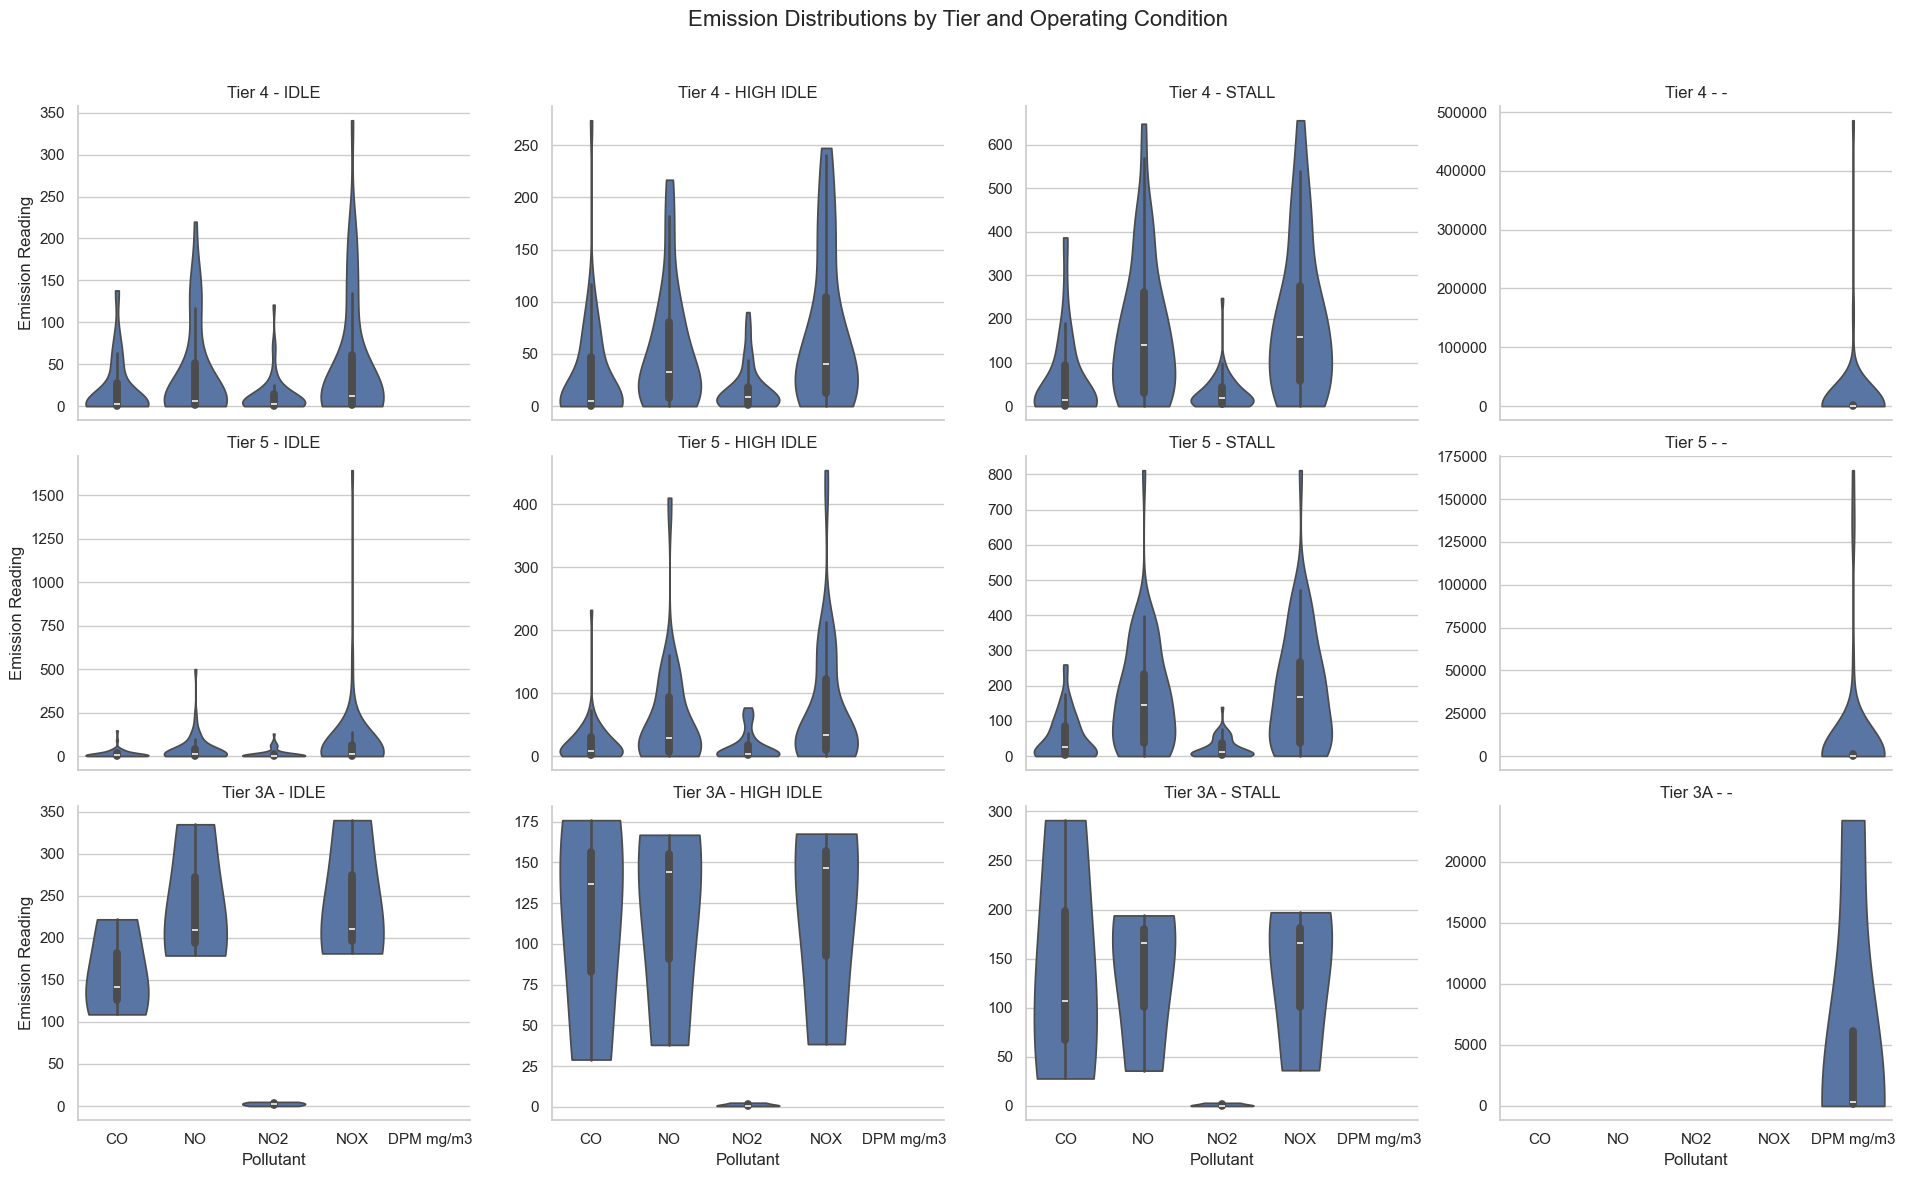

In [7]:
sns.set(style="whitegrid")
plot_data = df_clean[df_clean['Pollutant'].notna()]
g = sns.catplot(
    data=plot_data,
    x="Pollutant", y="Reading",
    col="Condition", row="Tier",
    kind="violin", cut=0, density_norm="count", inner="box", height=4, aspect=1.2,
    sharey=False
)
g.set_titles("{row_name} - {col_name}")
g.set_axis_labels("Pollutant", "Emission Reading")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distributions by Tier and Operating Condition", fontsize=16)
plt.show()

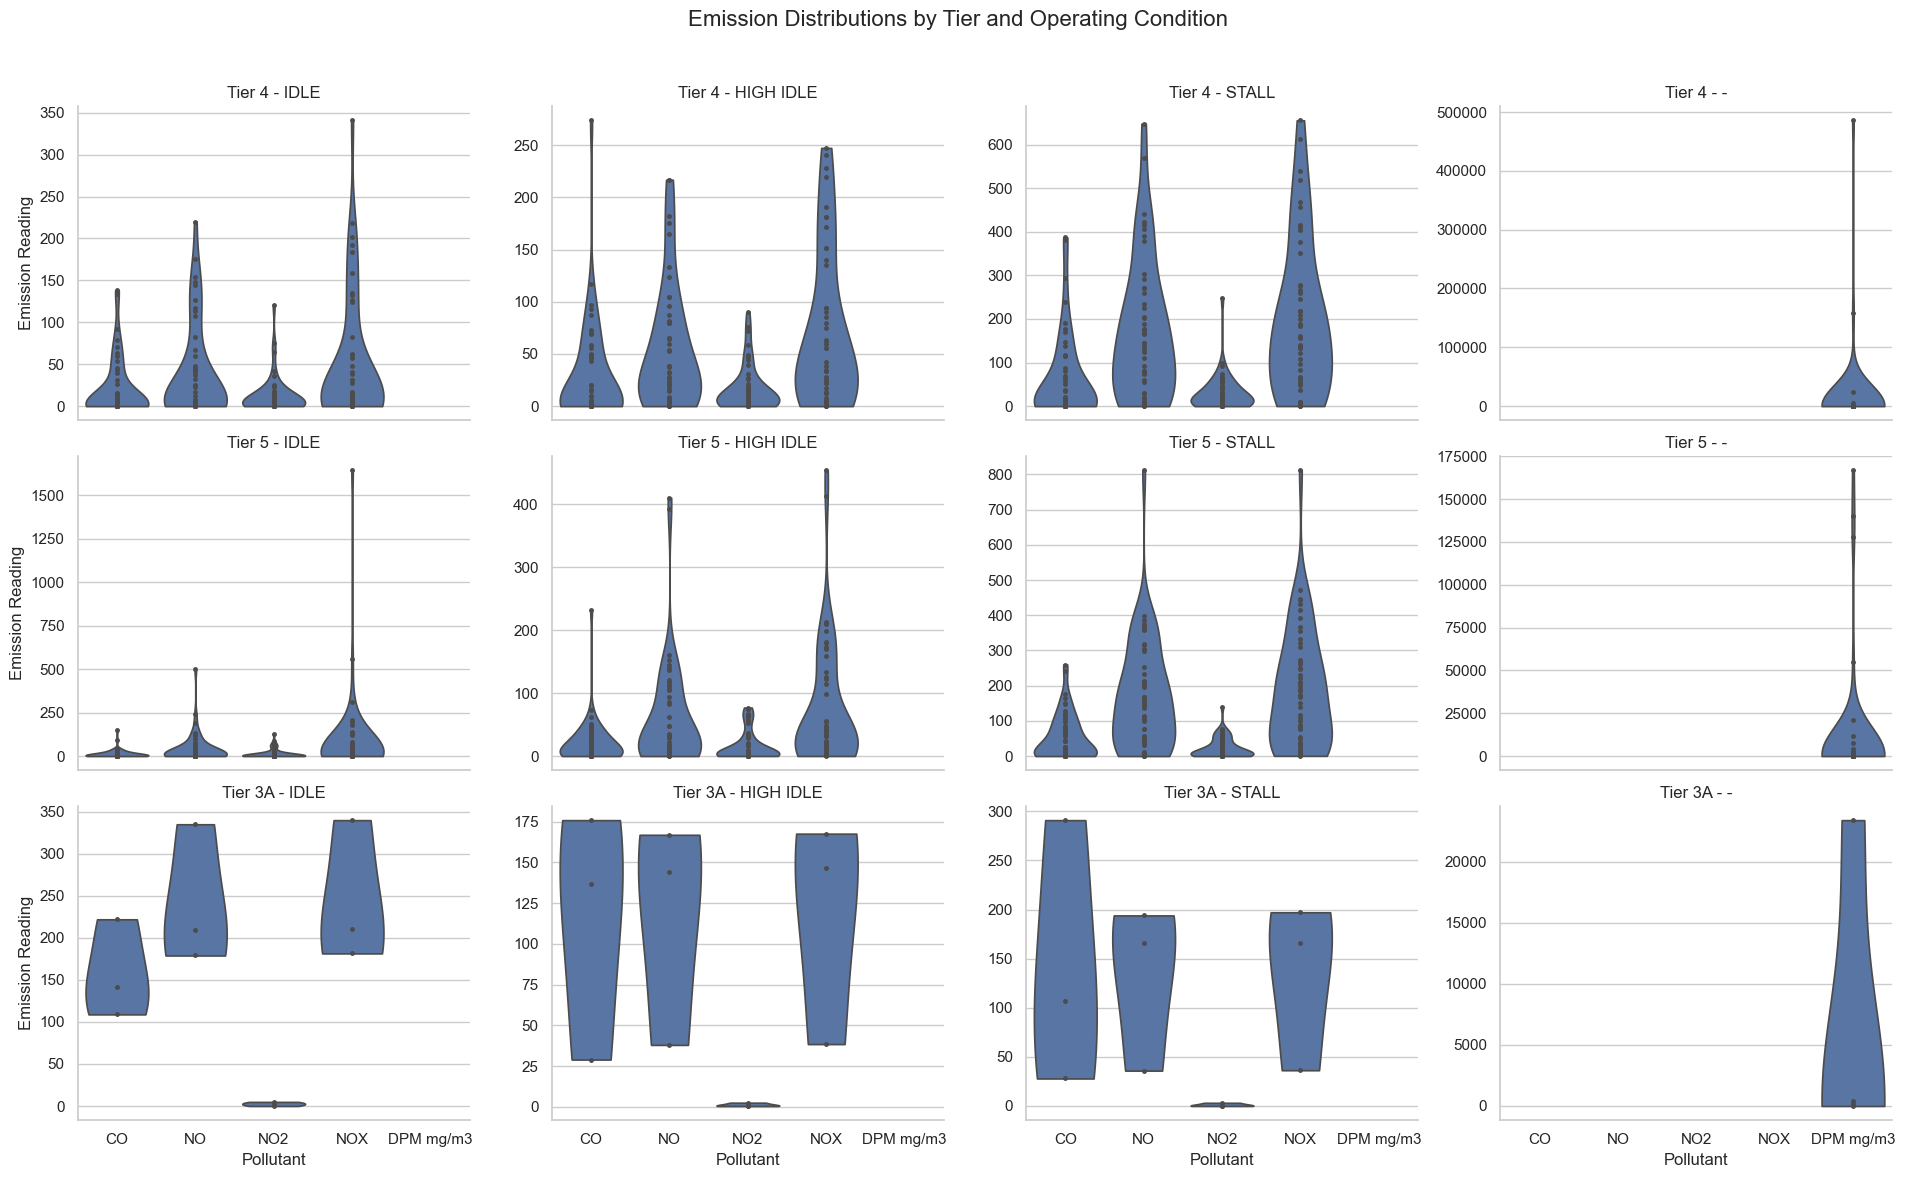

In [8]:
sns.set(style="whitegrid")
plot_data = df_clean[df_clean['Pollutant'].notna()]
g = sns.catplot(
    data=plot_data,
    x="Pollutant", y="Reading",
    col="Condition", row="Tier",
    kind="violin", cut=0, density_norm="count", inner="point", height=4, aspect=1.2,
    sharey=False
)
g.set_titles("{row_name} - {col_name}")
g.set_axis_labels("Pollutant", "Emission Reading")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distributions by Tier and Operating Condition", fontsize=16)
plt.show()

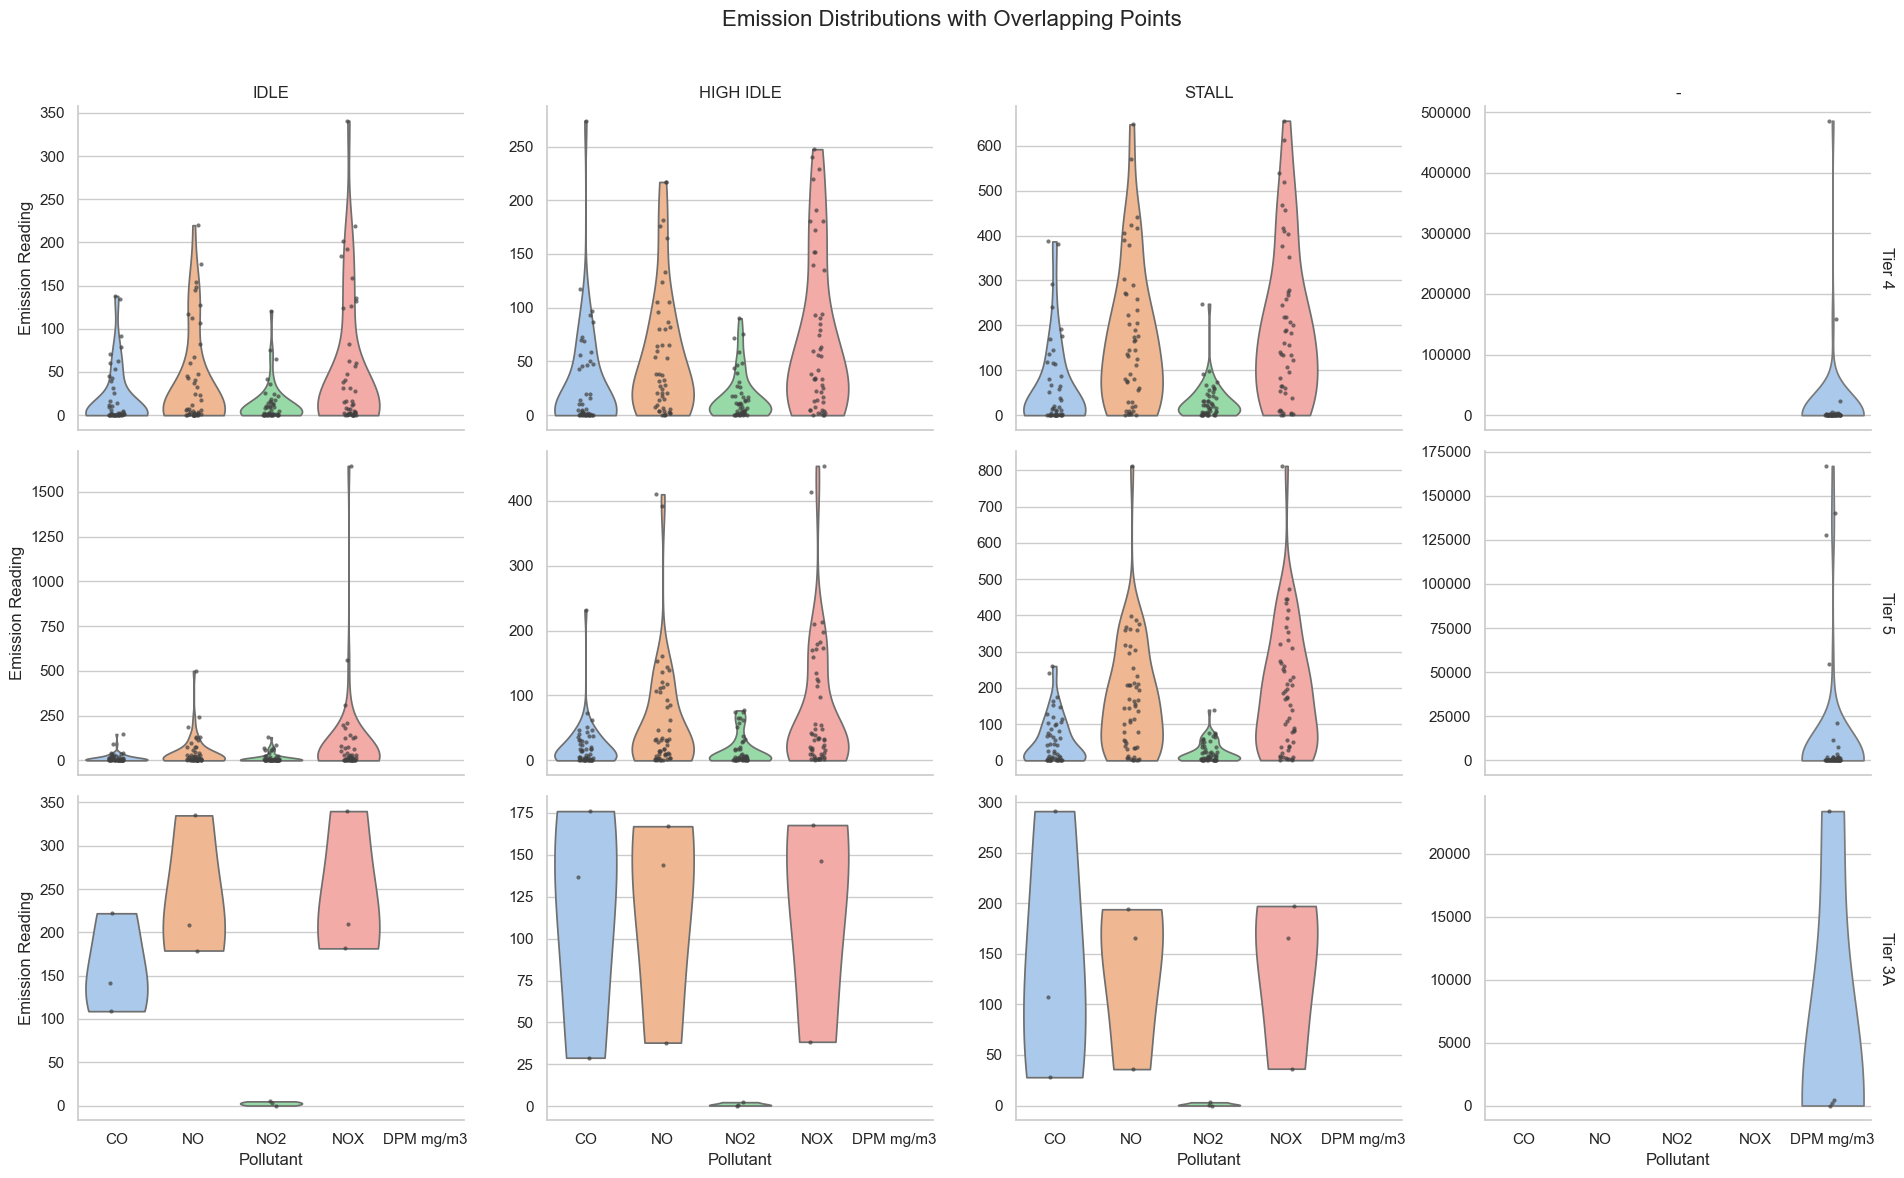

In [9]:
sns.set(style="whitegrid")

plot_data = df_clean[df_clean['Pollutant'].notna()]

# Create FacetGrid
g = sns.FacetGrid(
    data=plot_data,
    row="Tier", col="Condition",
    margin_titles=True,
    sharey=False,
    height=4, aspect=1.2
)

# Map violinplot to grid
g.map_dataframe(
    sns.violinplot,
    x="Pollutant", y="Reading",
    inner=None, cut=0, density_norm="count", palette="pastel", hue="Pollutant", legend=False
)

# Overlay swarmplot
g.map_dataframe(
    sns.stripplot,
    x="Pollutant", y="Reading",
    size=3, color=".25", alpha=0.7
)

# Tidy up plot titles and labels
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels("Pollutant", "Emission Reading")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distributions with Overlapping Points", fontsize=16)
plt.show()

C:\Users\19065963\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\19065963\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\19065963\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is dep

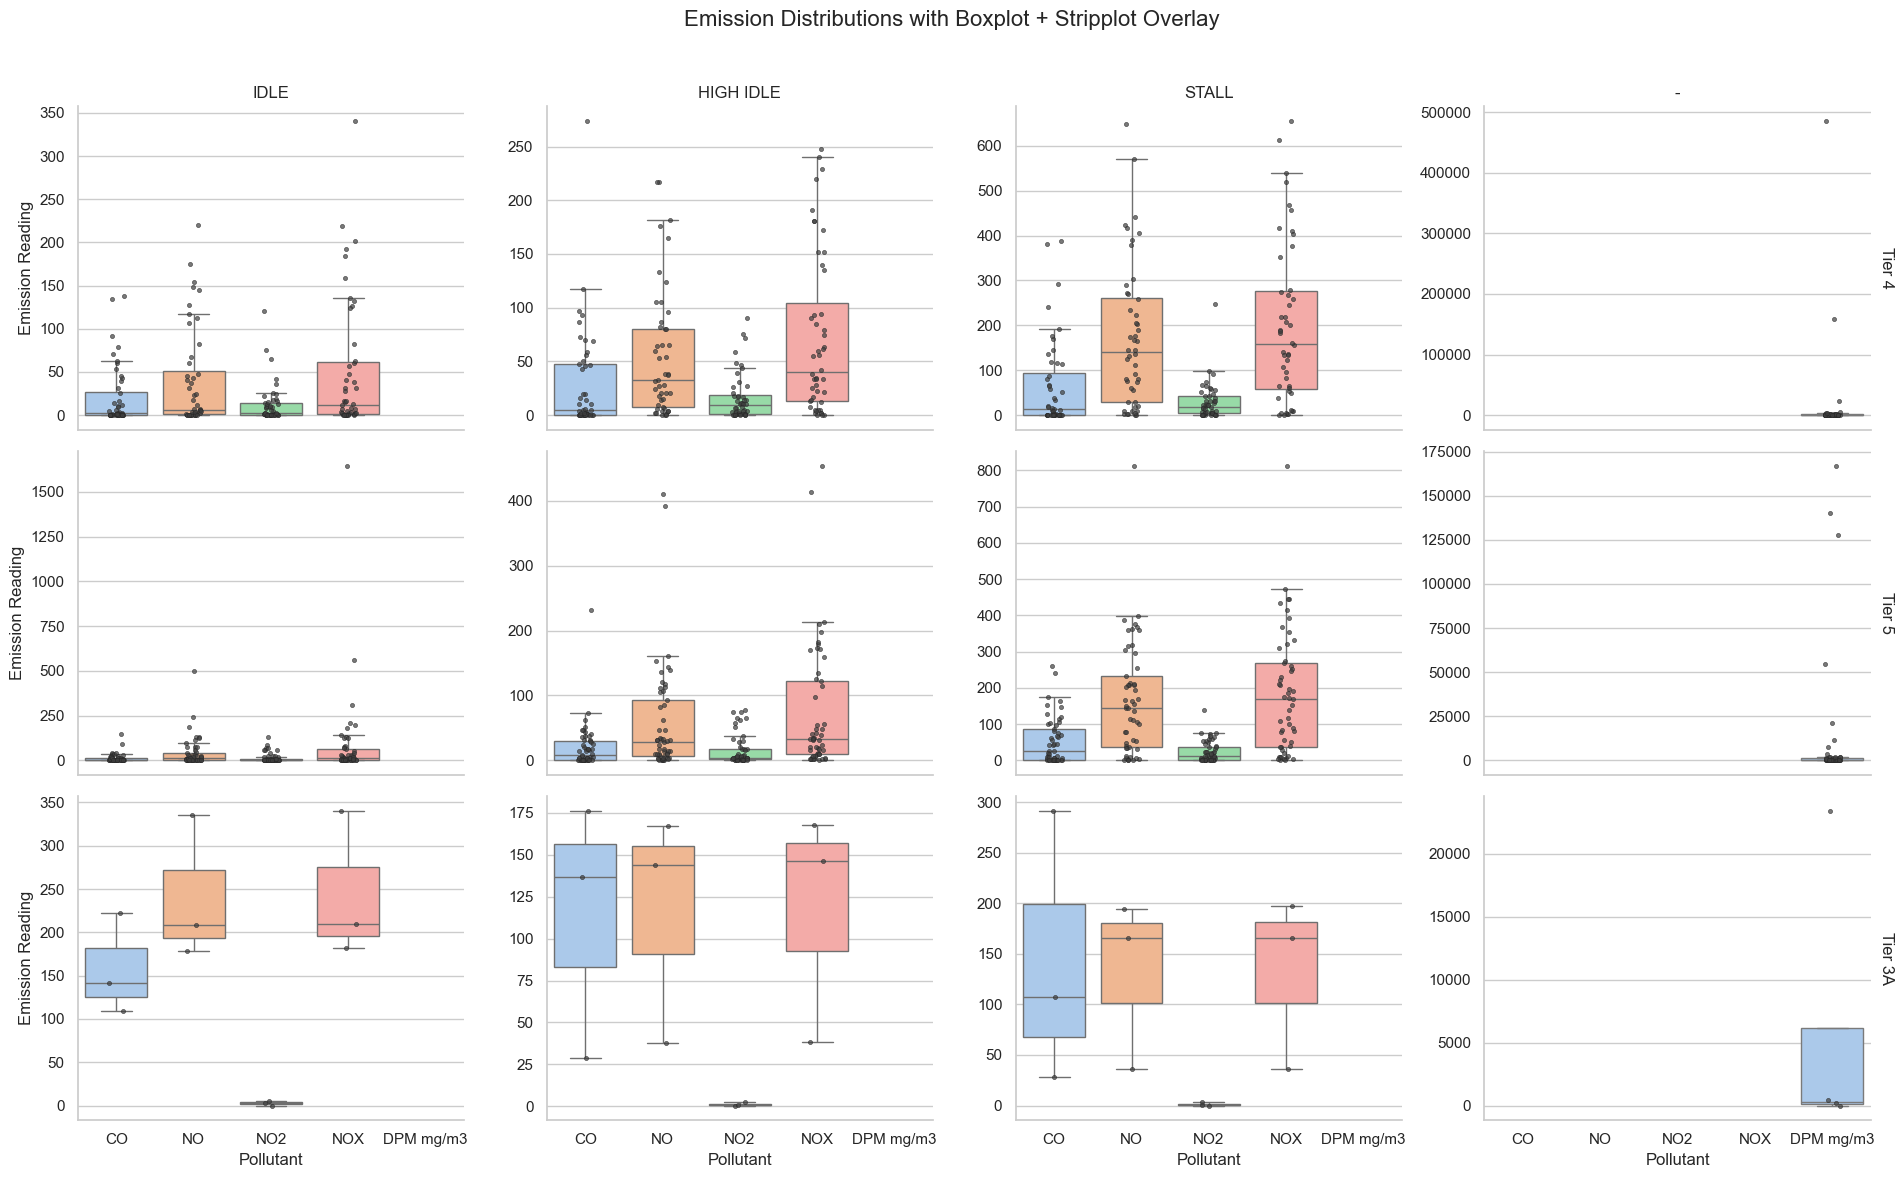

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Filter to include only rows with valid pollutants
plot_data = df_clean[df_clean['Pollutant'].notna()]

# Create FacetGrid by Tier and Condition
g = sns.FacetGrid(
    data=plot_data,
    row="Tier", col="Condition",
    margin_titles=True,
    sharey=False,
    height=4, aspect=1.2
)

# Map boxplot first (for distribution visualization)
g.map_dataframe(
    sns.boxplot,
    x="Pollutant", y="Reading",
    palette="pastel", fliersize=0,  # suppress default outlier points from boxplot
    showfliers=False
)

# Overlay with swarmplot (for seeing all points including outliers)
g.map_dataframe(
    sns.stripplot,
    x="Pollutant", y="Reading",
    size=3, color=".25", alpha=0.7, linewidth=0.5
)

# Improve layout
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels("Pollutant", "Emission Reading")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distributions with Boxplot + Stripplot Overlay", fontsize=16)
plt.show()


----------------------------------

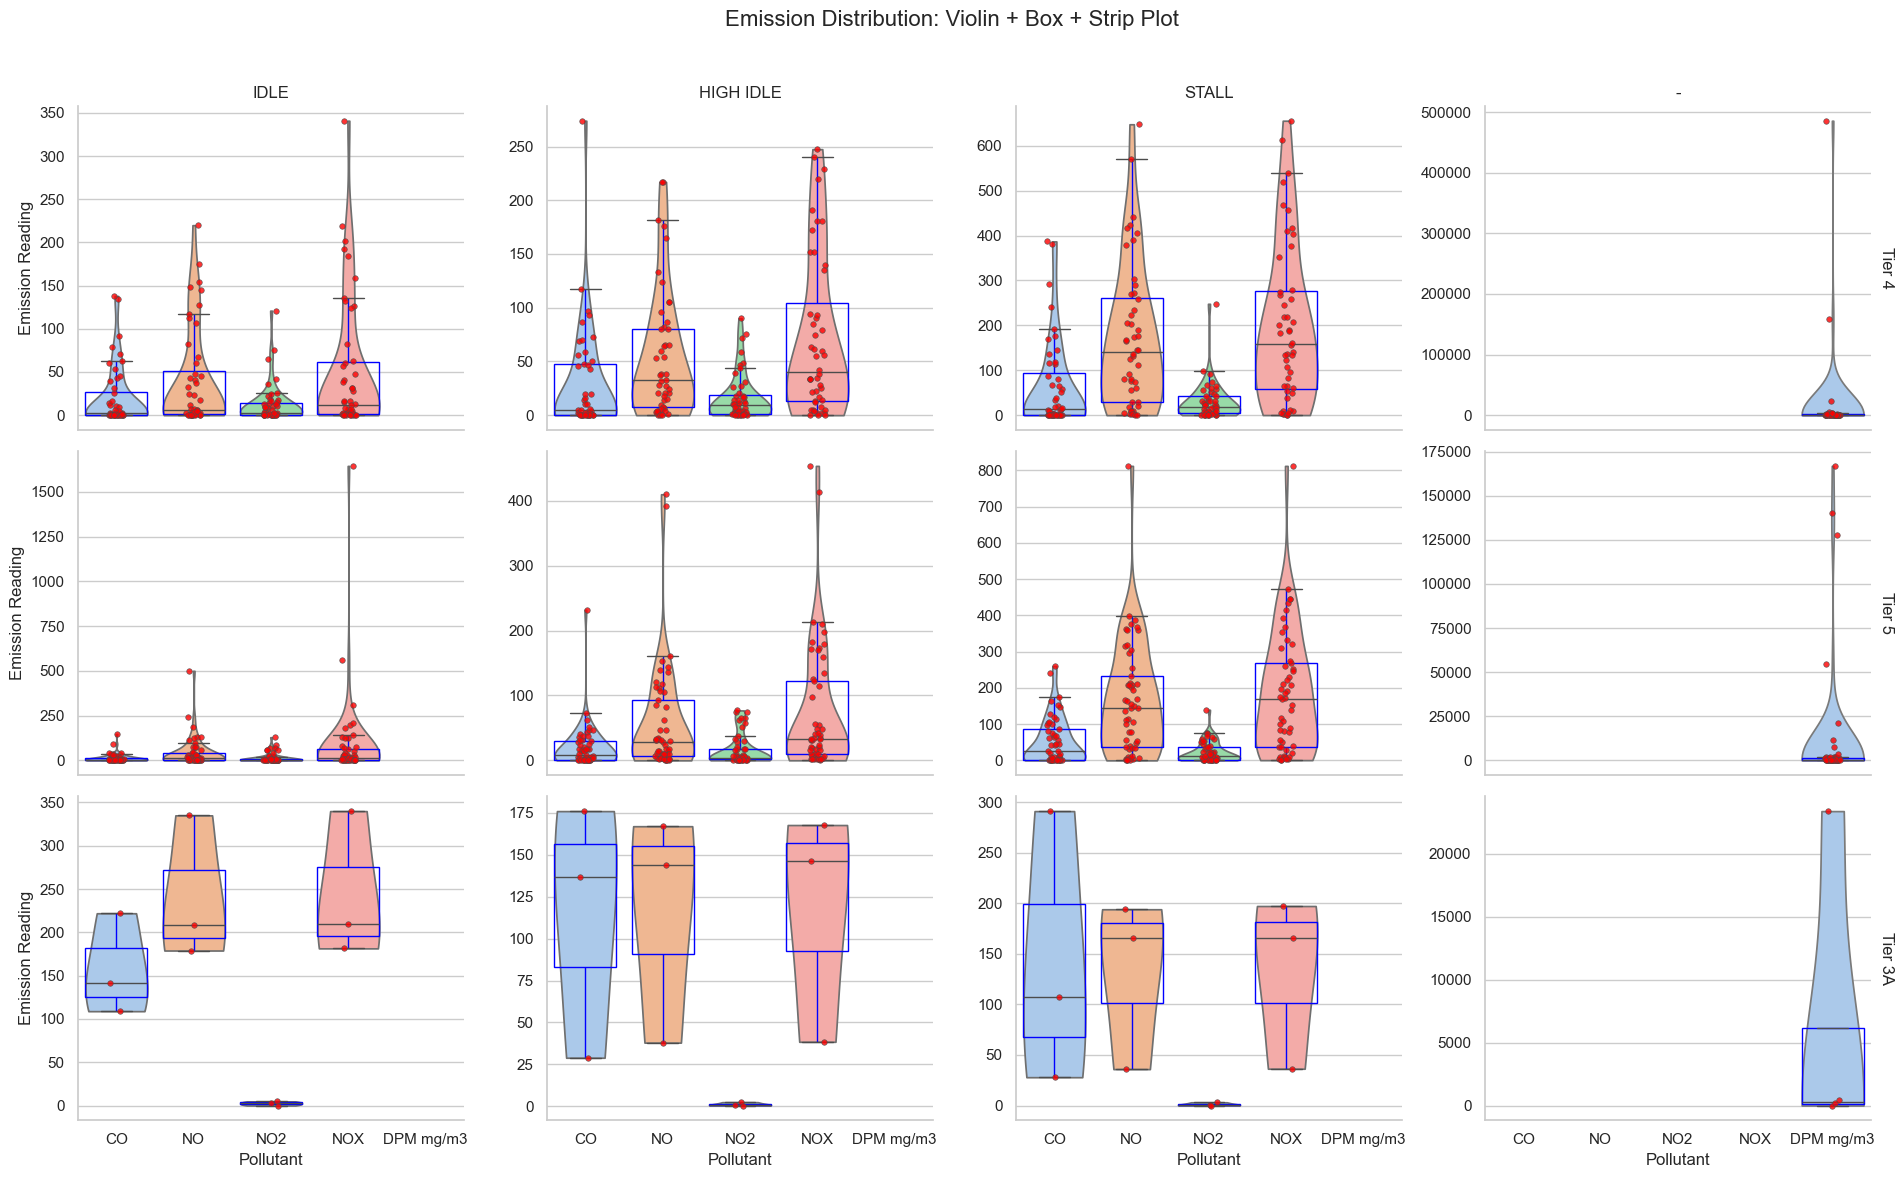

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Filter valid pollutant readings
plot_data = df_clean[df_clean['Pollutant'].notna()]

# Create FacetGrid by Tier and Condition
g = sns.FacetGrid(
    data=plot_data,
    row="Tier", col="Condition",
    margin_titles=True,
    sharey=False,
    height=4, aspect=1.2
)

# Violin plot: smooth distribution
g.map_dataframe(
    sns.violinplot,
    x="Pollutant", y="Reading",
    inner=None, cut=0, density_norm="count",
    palette="pastel", hue="Pollutant", legend=False
)

# Boxplot: median + IQR
g.map_dataframe(
    sns.boxplot,
    x="Pollutant", y="Reading",
    showcaps=True,
    boxprops={'facecolor':'none', 'edgecolor':'blue'},
    whiskerprops={'color':'blue'},
    fliersize=0, linewidth=1
)

# Swarmplot: actual data points, now larger and dark blue
g.map_dataframe(
    sns.stripplot,
    x="Pollutant", y="Reading",
    size=4, color="#ff0000", alpha=0.8, linewidth=0.5
)

# Layout cleanup
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels("Pollutant", "Emission Reading")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distribution: Violin + Box + Strip Plot", fontsize=16)
plt.show()


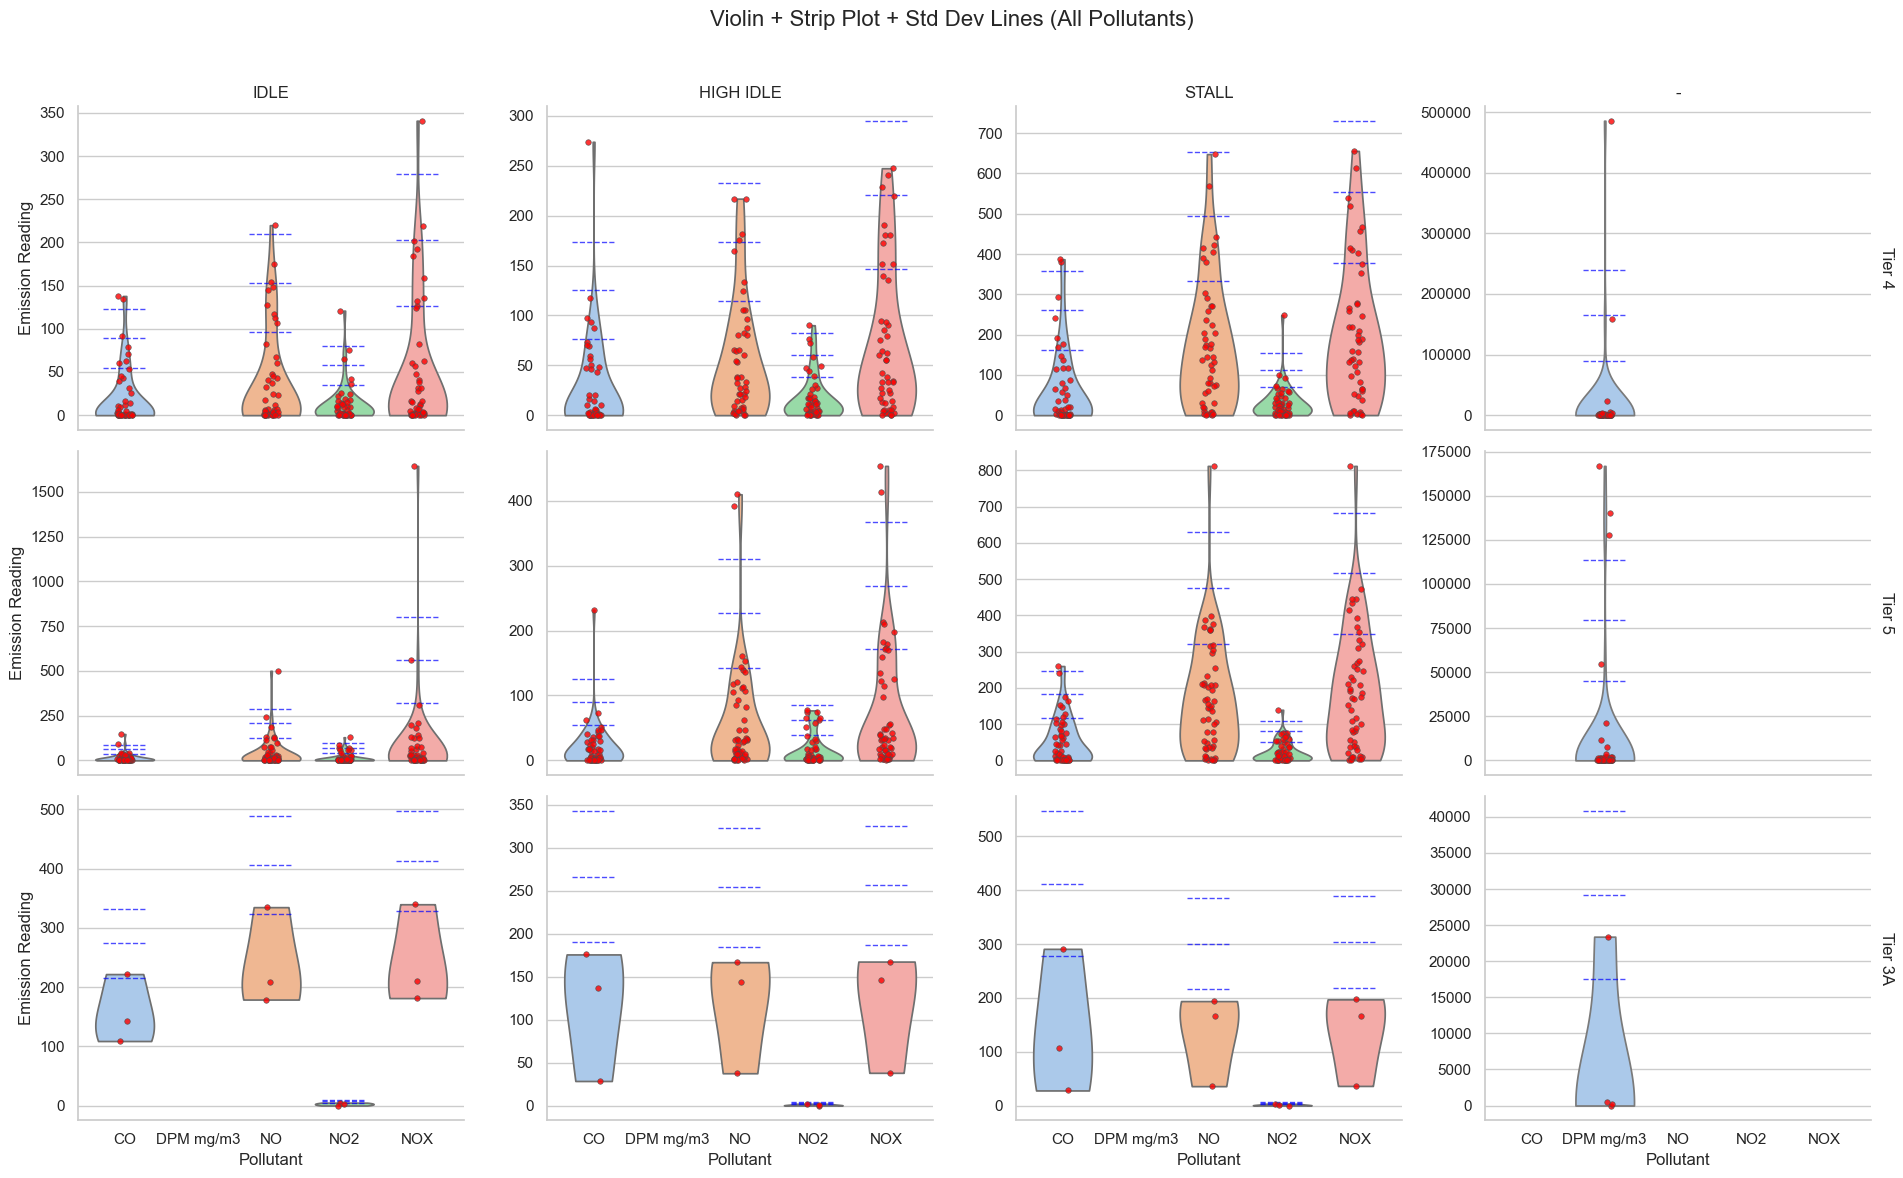

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

# Filter valid data
plot_data = df_clean[df_clean['Pollutant'].notna()]

# Dynamically detect and sort pollutants
pollutant_order = sorted(plot_data['Pollutant'].unique())

# Compute mean and std
stats_df = (
    plot_data.groupby(['Tier', 'Condition', 'Pollutant'])['Reading']
    .agg(['mean', 'std']).reset_index()
)

# Create FacetGrid
g = sns.FacetGrid(
    data=plot_data,
    row="Tier", col="Condition",
    margin_titles=True, sharey=False,
    height=4, aspect=1.2
)

# Step 1: Violin Plot
g.map_dataframe(
    sns.violinplot,
    x="Pollutant", y="Reading",
    order=pollutant_order,
    inner=None, cut=0, density_norm="count",
    palette="pastel", hue="Pollutant", legend=False
)

# Step 2: Swarm Plot (highlighted in red)
g.map_dataframe(
    sns.stripplot,
    x="Pollutant", y="Reading",
    order=pollutant_order,
    size=4, color="#ff0000", alpha=0.8, linewidth=0.5
)

# Step 3: Draw only +1σ, +2σ, +3σ lines
def draw_std_lines(data, **kwargs):
    ax = plt.gca()
    tier = data['Tier'].iloc[0]
    condition = data['Condition'].iloc[0]

    for i, pollutant in enumerate(pollutant_order):
        row = stats_df[
            (stats_df['Tier'] == tier) &
            (stats_df['Condition'] == condition) &
            (stats_df['Pollutant'] == pollutant)
        ]
        if not row.empty:
            mean = row['mean'].values[0]
            std = row['std'].values[0]
            for k in range(1, 4):
                y = mean + k * std
                ax.hlines(
                    y, i - 0.3, i + 0.3,
                    colors='blue', linestyles='--',
                    linewidth=1, alpha=0.7
                )

# Overlay std dev lines
g.map_dataframe(draw_std_lines)

# Add labels and title
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels("Pollutant", "Emission Reading")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Violin + Strip Plot + Std Dev Lines (All Pollutants)", fontsize=16)
plt.show()


----------------------------------

In [13]:
def filter_outliers_iqr(group):
    Q1 = group['Reading'].quantile(0.25)
    Q3 = group['Reading'].quantile(0.75)
    IQR = Q3 - Q1
    # return group[(group['Reading'] >= Q1 - 1.5 * IQR) & (group['Reading'] <= Q3 + 1.5 * IQR)]
    return group[(group['Reading'] >= Q1) & (group['Reading'] <= Q3)]

df_filtered_iqr = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(filter_outliers_iqr).reset_index(drop=True)
df_filtered_iqr.head

C:\Users\19065963\AppData\Local\Temp\ipykernel_39800\3238172583.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered_iqr = df_clean.groupby(['Tier', 'Condition', 'Pollutant']).apply(filter_outliers_iqr).reset_index(drop=True)


<bound method NDFrame.head of     Machine Number       Category  Reading     Tier  Condition  Pollutant
0            RB016    - DPM mg/m3   200.00  Tier 3A          -  DPM mg/m3
1            RB016    - DPM mg/m3   420.00  Tier 3A          -  DPM mg/m3
2            RB016   HIGH IDLE CO   137.00  Tier 3A  HIGH IDLE         CO
3            RB016   HIGH IDLE NO   144.00  Tier 3A  HIGH IDLE         NO
4            RB016  HIGH IDLE NO2     0.70  Tier 3A  HIGH IDLE        NO2
5            RB016  HIGH IDLE NOX   146.50  Tier 3A  HIGH IDLE        NOX
6            RB016        IDLE CO   142.00  Tier 3A       IDLE         CO
7            RB016        IDLE NO   209.00  Tier 3A       IDLE         NO
8            RB016       IDLE NO2     2.50  Tier 3A       IDLE        NO2
9            RB016       IDLE NOX   209.90  Tier 3A       IDLE        NOX
10           RB016       STALL CO   107.00  Tier 3A      STALL         CO
11           RB016       STALL NO   166.00  Tier 3A      STALL         NO
12      

In [14]:
# Remove rows with 'idle' or 'stall' in the Condition column (case-insensitive), but keep 'high idle'
df_filtered_iqr_no_idle_stall = df_filtered_iqr[~df_filtered_iqr['Condition'].str.lower().isin(['idle', 'stall'])]

# Compute average values post-filtering
average_values = df_filtered_iqr_no_idle_stall.groupby(['Tier', 'Condition', 'Pollutant'])['Reading'].mean().reset_index()
average_values.rename(columns={'Reading': 'Average Reading'}, inplace=True)

# Compute what the average values would look like if doubled
average_values['Doubled Average'] = average_values['Average Reading'] * 2

# Add Time Weighted Average and Short Term Exposure Limit columns
exposure_limits = pd.DataFrame({
    'Pollutant': ['CO', 'NO', 'NO2', 'NOX', 'DPM mg/m3'],
    'TWA': [30, 25, 3, '-', 0.1],
    'STEL': ['-', '-', 5, '-', '-']
})

average_values = average_values.merge(exposure_limits, on='Pollutant', how='left')

# Display the result
average_values


,Tier,Condition,Pollutant,Average Reading,Doubled Average,TWA,STEL
0,Tier 3A,-,DPM mg/m3,310.000000,620.000000,0.1,-
1,Tier 3A,HIGH IDLE,CO,137.000000,274.000000,30,-
2,Tier 3A,HIGH IDLE,NO,144.000000,288.000000,25,-
3,Tier 3A,HIGH IDLE,NO2,0.700000,1.400000,3,5
4,Tier 3A,HIGH IDLE,NOX,146.500000,293.000000,-,-
5,Tier 4,-,DPM mg/m3,509.130435,1018.260870,0.1,-
6,Tier 4,HIGH IDLE,CO,7.250278,14.500556,30,-
7,Tier 4,HIGH IDLE,NO,37.708333,75.416667,25,-
8,Tier 4,HIGH IDLE,NO2,8.648000,17.296000,3,5
9,Tier 4,HIGH IDLE,NOX,48.758333,97.516667,-,-


-----------------------------

In [ ]:

# === Filter out data points >|3 std devs| and compute adjusted stats ===
import numpy as np

# Filter out extreme outliers (> |3 * std| from the mean for each Pollutant under each Tier & Condition)
def filter_3std_outliers(df):
    def filter_group(group):
        mean = group['Reading'].mean()
        std = group['Reading'].std()
        return group[np.abs(group['Reading'] - mean) <= 1 * std]
    return df.groupby(['Tier', 'Condition', 'Pollutant'], group_keys=False).apply(filter_group)

df_filtered_std = filter_3std_outliers(df_clean)


C:\Users\19065963\AppData\Local\Temp\ipykernel_45356\4006906810.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(['Tier', 'Condition', 'Pollutant'], group_keys=False).apply(filter_group)


,Machine Number,Category,Reading,Tier,Condition,Pollutant
39,LD070,DPM mg/m3,130.00,Tier 4,DPM,mg/m3
53,LD071,DPM mg/m3,20.00,Tier 4,DPM,mg/m3
67,LD076,DPM mg/m3,1470.00,Tier 4,DPM,mg/m3
80,LD076,DPM mg/m3,840.00,Tier 4,DPM,mg/m3
107,LD078,DPM mg/m3,1440.00,Tier 4,DPM,mg/m3
135,LD094,DPM mg/m3,0.00,Tier 4,DPM,mg/m3
31,LD070,HIGH IDLE CO,2.00,Tier 4,HIGH IDLE,CO
59,LD076,HIGH IDLE CO,0.00,Tier 4,HIGH IDLE,CO
72,LD076,HIGH IDLE CO,2.00,Tier 4,HIGH IDLE,CO
86,LD078,HIGH IDLE CO,6.00,Tier 4,HIGH IDLE,CO


In [ ]:

# Compute average values post-filtering
average_values = df_filtered_std.groupby(['Tier', 'Condition', 'Pollutant'])['Reading'].mean().reset_index()
average_values.rename(columns={'Reading': 'Average Reading'}, inplace=True)

# Compute what the average values would look like if doubled
average_values['Doubled Average'] = average_values['Average Reading'] * 2

# Display the result
df_filtered_std


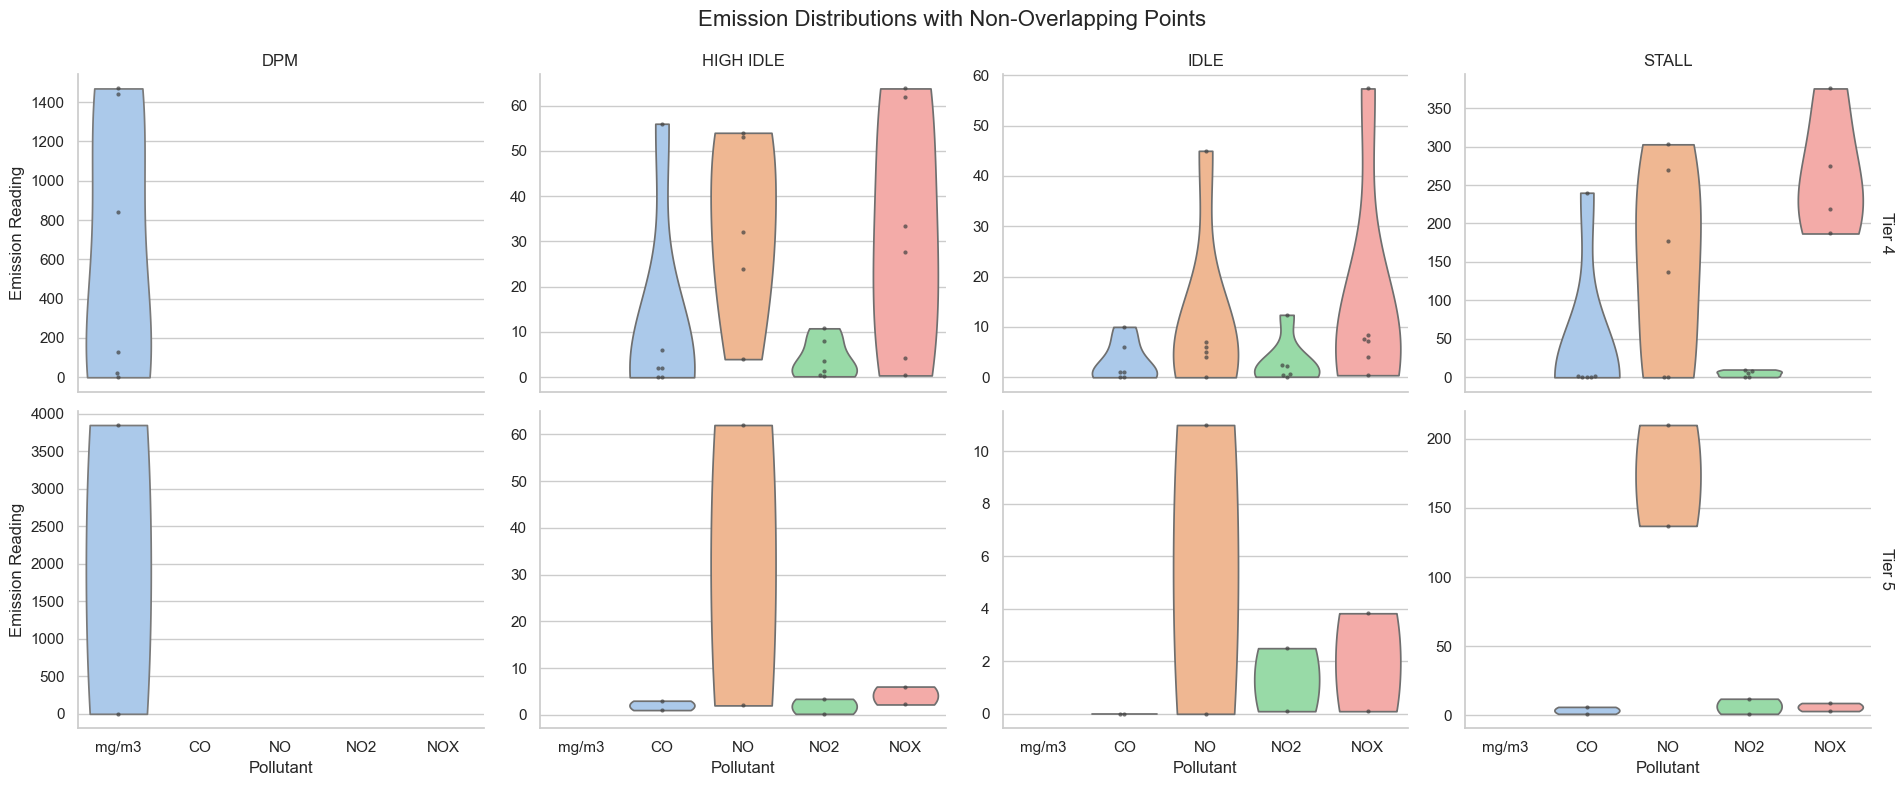

In [42]:
sns.set(style="whitegrid")

plot_data = df_filtered_std[df_filtered_std['Pollutant'].notna()]

# Create FacetGrid
g = sns.FacetGrid(
    data=plot_data,
    row="Tier", col="Condition",
    margin_titles=True,
    sharey=False,
    height=4, aspect=1.2
)

# Map violinplot to grid
g.map_dataframe(
    sns.violinplot,
    x="Pollutant", y="Reading",
    inner=None, cut=0, density_norm="count", palette="pastel", hue="Pollutant", legend=False
)

# Overlay swarmplot
g.map_dataframe(
    sns.swarmplot,
    x="Pollutant", y="Reading",
    size=3, color=".25", alpha=0.7
)

# Tidy up plot titles and labels
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels("Pollutant", "Emission Reading")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Emission Distributions with Non-Overlapping Points", fontsize=16)
plt.show()